<a href="https://colab.research.google.com/github/GUC-DM/mini-project-2-georgina-adel-bit07-ahmed-walid-bit07/blob/main/Mini-Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 2 - Clustering

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Walid El Bourgy

ID: 43-2812

Tutorial: T-07

---

Name: Georgina Adel Naguib Habib

ID: 43-2654

Tutorial: T-07

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Binary:

- mode (0 = Minor, 1 = Major; representing whether the track starts with a major (1) chord progression or not (0))
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

**Note**: the data URL is `https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv`

## Importing Libraries \& Dataset

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('telecom_churn.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv')
df

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


## Data Inspection & Cleaning (if any)

In [27]:
df=df.drop([3])

Here, we see if there is any missing values, and as you can there is no null values

In [28]:
df.isnull().any()
df.isnull().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [29]:
df[df['genres'] == "[]"].count()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [30]:
df['genres'].nunique()

2972

In [31]:
df['genres'].unique()

array(['21st century classical', '432hz', '8-bit', ..., 'zouk',
       'zurich indie', 'zydeco'], dtype=object)

## Exploratory Data Analysis

**Q1: What are the 20 most danceable music genres?**

The X the Varibale takes the 20 most danceable genres. Then the array takes the indexes of the x in an array, then we loop on the array to rename the index with it's corresponding genre in the df.

In [32]:
x=df['danceability'].nlargest(20)
array = x.index
array
for i in range(len(array)):
    x.rename( index={x.index[i]: df.iloc[x.index[i]-1].iloc[1]}, inplace=True)

x

experimental house          0.929000
guam indie                  0.920000
dutch hip hop               0.911000
dutch rap pop               0.907400
british children's music    0.906000
indie deutschrap            0.903000
trance mexicano             0.902000
footwork                    0.897000
funk paulista               0.896000
proto-rap                   0.893000
tamaulipas rap              0.892000
danish hip hop              0.891000
alberta hip hop             0.885000
serbian electronic          0.883000
corridos cristianos         0.881000
trap venezolano             0.877000
atmospheric post-rock       0.869000
zouglou                     0.863000
miami bass                  0.860289
cumbia santafesina          0.860000
Name: danceability, dtype: float64

Note on the following code, it displays the brain waves, followed by the binaural, but please note that they both have the values of 0.001002 in energy, so they are equal.

**Q2: What are the 20 lowest energy music genres?**

The y the Varibale takes the 20 lowest energy genres. Then the array takes the indexes of the y in an array, then we loop on the array to rename the index with it's corresponding genre in the df.

In [33]:
y=df['energy'].nsmallest(20)
array = y.index
array
for i in range(len(array)):
    y.rename( index={y.index[i]: df.iloc[y.index[i]-1].iloc[1]}, inplace=True)

y

binaural                            0.001002
brain waves                         0.001002
korean classical piano              0.003950
singing bowl                        0.004130
medieval                            0.004440
italian classical guitar            0.005490
native american spiritual           0.008390
caucasian classical piano           0.008877
australian ambient                  0.008900
dutch classical piano               0.011550
balkan classical piano              0.012015
bible                               0.016100
baltic classical                    0.019407
boy soprano                         0.021500
australian choir                    0.021800
ghanaian traditional                0.022400
warm drone                          0.023600
american 21st century classical     0.023950
contemporary choir                  0.023950
hungarian contemporary classical    0.025200
Name: energy, dtype: float64

**Q3: What are the 20 loudest music genres?**

The z the Varibale takes the 20 loudest genres. Then the array takes the indexes of the z in an array, then we loop on the array to rename the index with it's corresponding genre in the df.

In [34]:
z=df['loudness'].nlargest(20)
array = z.index
array
for i in range(len(array)):
    z.rename( index={z.index[i]: df.iloc[z.index[i]-1].iloc[1]}, inplace=True)

z

nederlandse hardstyle     0.060000
action rock              -0.253000
memphis indie            -0.253000
arabic hip hop           -0.910000
middle east hip hop      -0.910000
palestinian pop          -0.910000
japanese metalcore       -1.627389
birmingham hip hop       -1.714000
j-idol                   -1.810810
japanese indie rock      -1.820000
japanese post-hardcore   -2.000750
nz hardcore              -2.112000
nz punk                  -2.112000
belarusian pop           -2.210000
belarusian rock          -2.210000
xtra raw                 -2.344000
norwegian punk rock      -2.382500
alt-idol                 -2.623250
kawaii metal             -2.623250
russian dance            -2.634000
Name: loudness, dtype: float64

**Q4: What are the 20 music genres most commonly performed live?**

The a the Varibale takes the 20 genres most common;y performed live. Then the array takes the indexes of the a in an array, then we loop on the array to rename the index with it's corresponding genre in the df.

In [35]:
a=df['liveness'].nlargest(20)
array = a.index
array
for i in range(len(array)):
    a.rename( index={a.index[i]: df.iloc[a.index[i]-1].iloc[1]}, inplace=True)

a

modular synth              0.960000
gujarati garba             0.883000
trance mexicano            0.880000
mindfulness                0.864250
birdsong                   0.799833
new comedy                 0.749700
deep comedy                0.721750
autoharp                   0.719000
clean comedy               0.711513
atmospheric post-metal     0.706000
atmospheric sludge         0.706000
dutch jazz                 0.706000
musica paraibana           0.704000
irish banjo                0.693333
west australian hip hop    0.687000
greek house                0.670000
organic electronic         0.670000
j-acoustic                 0.669000
classic icelandic pop      0.665000
turkish trap               0.649933
Name: liveness, dtype: float64

**Q5: What are the 20 most popular music genres?**

The b the Varibale takes the 20 most popular  genres. Then the array takes the indexes of the b in an array, then we loop on the array to rename the index with it's corresponding genre in the df.

In [36]:
b=df['popularity'].nlargest(20)
array = b.index
array
for i in range(len(array)):
    b.rename( index={b.index[i]: df.iloc[b.index[i]-1].iloc[1]}, inplace=True)

b

basshall               80.666667
south african house    80.000000
trap venezolano        80.000000
turkish edm            80.000000
alberta hip hop        78.500000
chinese electropop     78.500000
afroswing              77.312500
afro soul              77.000000
circuit                77.000000
guaracha               77.000000
indie triste           77.000000
russian dance          77.000000
uk diy punk            77.000000
pagode baiano          76.666667
ritmo kombina          76.333333
trap triste            76.083333
norwegian pop rap      76.000000
urbano espanol         75.250000
musica canaria         75.166667
argentine hip hop      74.979167
Name: popularity, dtype: float64

# Clustering

In the following code, we simply created a new dataframe that we tweaked a little so we can use during the clustering. Bellow, we turned the genres from strings to simple numbers.

In [37]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()


ml= LabelEncoder()
df_encoded['genres'] = ml.fit_transform(df['genres'])
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()


ml= LabelEncoder()
df_encoded['genres'] = ml.fit_transform(df['genres'])
df_encoded.drop('mode', axis=1, inplace=True)
df_encoded.drop('key', axis=1, inplace=True)

Here, we scaled the value of the liveness using the scaling function which in essence do the Z-score normalization.

In [38]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(df_encoded[['liveness']])
scaled_data

array([[ 1.82784035],
       [-0.66906228],
       [-0.72320154],
       ...,
       [-1.11649318],
       [-0.14210683],
       [ 0.6830829 ]])

We decided to use the Elbow method as our way of having an insight on how many clusters we should use. And it was clear that having clsuters between 4 and 5 is the optimum solution. 

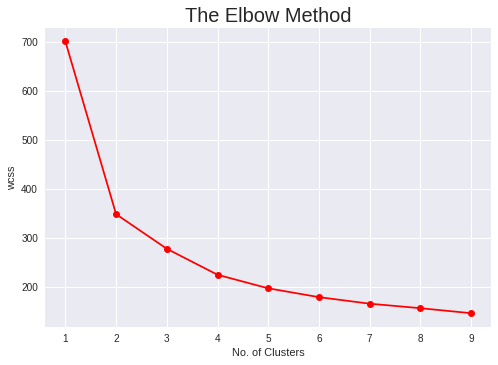

In [39]:
from sklearn.cluster import KMeans
df_copy=df[['energy', 'speechiness', 'acousticness','danceability','valence', 'liveness']]
wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_copy)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 10), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

We chose 5 clusters and we clustered based on the given variables as they were the ones that would help us determine which genres belong together.

In [40]:
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

pred = km.fit_predict(df_encoded[['energy', 'speechiness', 'acousticness','danceability','valence', 'liveness']])

# Get the cluster labels for the fitted data
labels = km.labels_
labels
df_encoded['cluster'] = labels
df['cluster']=labels

we counded how many rows are there/cluster

In [41]:
frame = pd.DataFrame(df_encoded)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    869
2    604
0    541
4    503
1    455
Name: cluster, dtype: int64

we used a countplot to visualize it. 

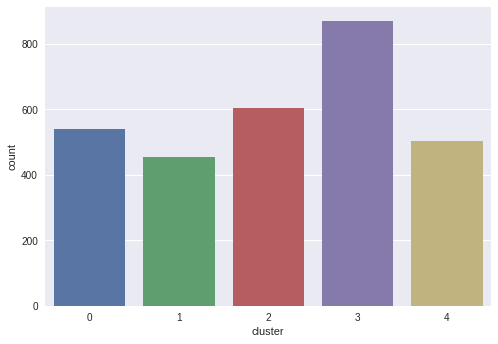

In [42]:
sns.countplot(x='cluster', data=df_encoded)

In accosticness, mind my spelling, we can see that box 2 is high in accosticness, which means that the genre witihin it are high in accosticness, box 3 is very low, which means that genres within it has low acousticness, which make sense in regard that virginia punk which in cluster 3 is low in acousticness.

Following that in all the boxplots that within them, all boxes that are high indicates that genres included within it is high on that feature, and vice versa.

In these boxplots we see the outliers in every columns with respect to the clusters. So, for example, duration has a huge number of outliers. Speachness it full of outliers as well. Cluster 3 in instrumentalness is full of outliers. speechness displayed a lot of outliers in each cluster. 

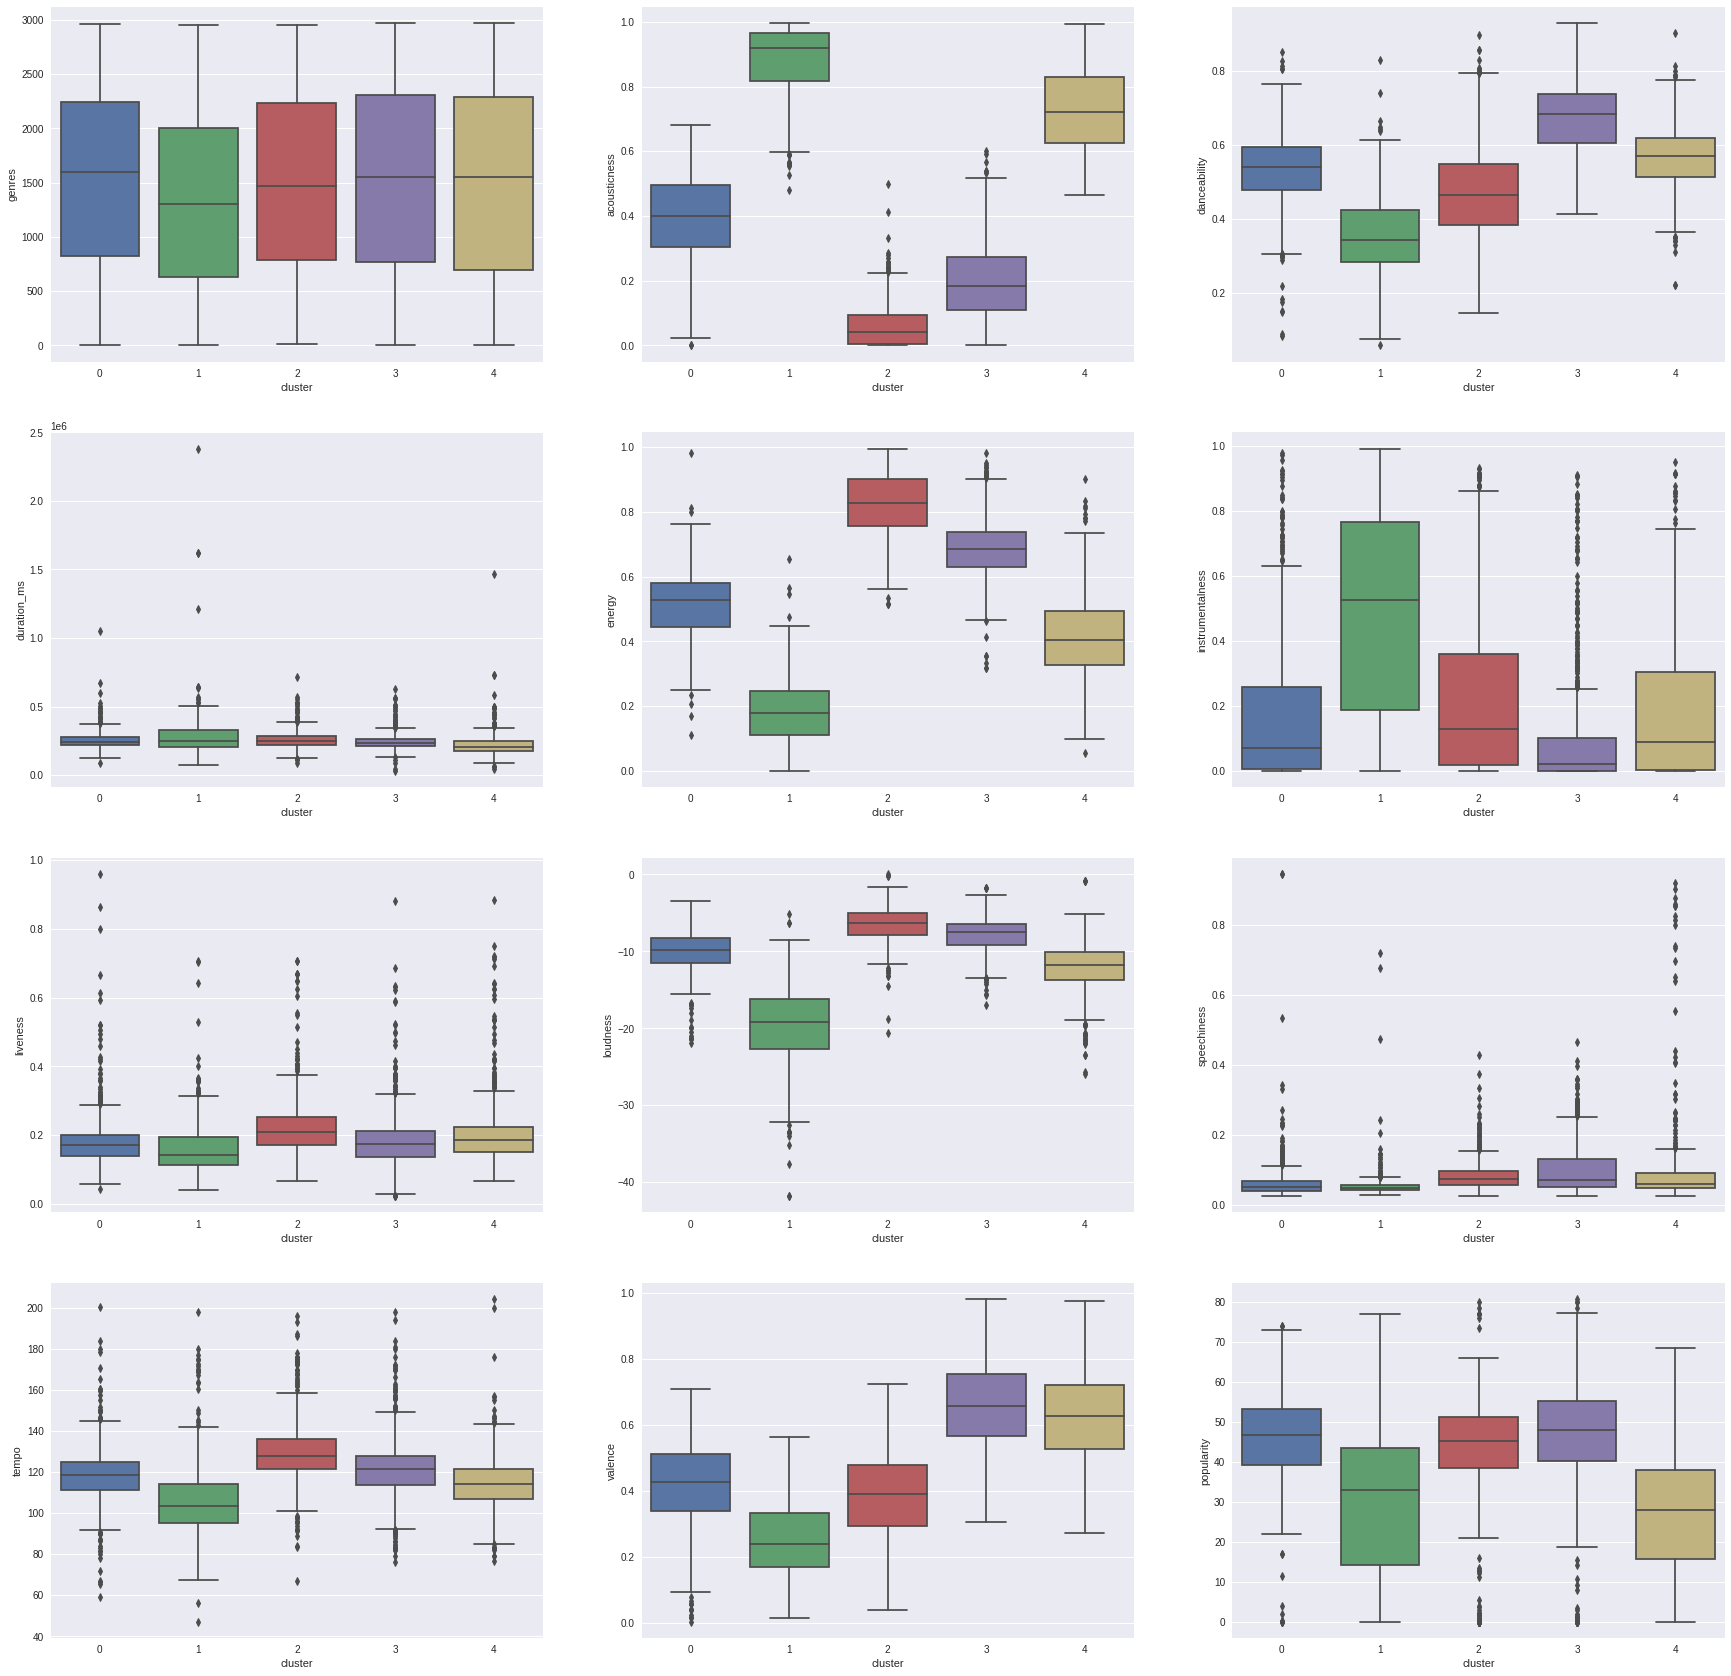

In [43]:
cols = df_encoded.select_dtypes('number').columns.drop(['cluster'])
n = int(len(cols)**(1/2))

plt.figure(figsize=(30,30))
for i, col in enumerate(cols, 1):
    plt.subplot(n+1, n, i)
    sns.boxplot(x='cluster', y=col, data=df_encoded)

In the following five blocks of code, we extratced 10 random samples from every cluster so we can have more insight about what genres are in every cluster.

In [44]:
x=df[df['cluster']==0].sample(10)
x

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
2264,1,puerto rican pop,0.423336,0.520339,241018.214649,0.609956,0.004835,0.220865,-7.842867,0.051912,114.940935,0.528421,53.958298,9,0
2140,1,pinoy praise,0.351918,0.357000,242831.250000,0.531450,0.000075,0.299567,-9.862250,0.036358,138.397917,0.289350,49.833333,7,0
1524,1,japanese vgm,0.534099,0.368319,203724.987990,0.521417,0.725311,0.264274,-11.303810,0.044178,118.421706,0.356048,45.349020,7,0
1309,1,hong kong rock,0.552000,0.725000,274693.000000,0.526000,0.000130,0.115000,-12.166000,0.030900,112.811000,0.479000,39.000000,5,0
1365,1,indie hip hop,0.388790,0.704367,205161.600000,0.507300,0.000013,0.303513,-9.305800,0.228027,107.624267,0.526333,49.300000,7,0
429,0,canadian electropop,0.194044,0.635724,212640.141534,0.631437,0.125718,0.145879,-6.590967,0.058643,110.265576,0.389604,56.703704,9,0
1343,1,idol,0.360698,0.483300,220173.064286,0.591257,0.130431,0.180802,-7.137229,0.040195,127.796229,0.472521,49.126190,5,0
2007,0,nottingham indie,0.256493,0.478700,260142.066667,0.411300,0.167198,0.132650,-11.606967,0.040063,129.888400,0.248407,51.800000,5,0
980,0,enka,0.565200,0.421800,207485.400000,0.396200,0.000036,0.302600,-9.536400,0.030180,120.504800,0.409800,44.000000,7,0
1867,0,musica popular mineira,0.338841,0.538724,175021.130288,0.460924,0.058197,0.190366,-12.605124,0.058488,125.279068,0.583981,41.411058,4,0


In [45]:
x=df[df['cluster']==1].sample(10)
x

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
75,1,american contemporary classical,0.938316,0.318150,331714.743172,0.111088,0.481780,0.142994,-25.939671,0.051622,99.853112,0.267309,30.585156,9,1
629,1,classical,0.923085,0.314425,312001.151573,0.164079,0.576012,0.172137,-20.972634,0.053454,103.157583,0.235625,17.142737,7,1
2935,1,wind ensemble,0.994500,0.327500,217566.500000,0.147100,0.907500,0.112500,-22.748000,0.044700,126.060000,0.474650,48.500000,3,1
1455,1,italian orchestra,0.930999,0.344525,310097.088225,0.197462,0.174188,0.240726,-16.820459,0.061424,102.566143,0.196788,16.594080,7,1
1977,1,nordic soundtrack,0.892500,0.250050,305610.250000,0.229750,0.918250,0.186550,-17.540250,0.039650,103.507125,0.075400,51.125000,7,1
637,1,classical era,0.961011,0.374795,259973.041870,0.148663,0.548127,0.150955,-20.494002,0.050937,110.367184,0.343931,9.711395,10,1
2945,1,world meditation,0.950786,0.349643,442902.714286,0.112900,0.878143,0.113350,-21.347714,0.036743,107.919143,0.109914,51.142857,1,1
1617,0,koto,0.889500,0.495667,461817.833333,0.124333,0.602980,0.090083,-19.911333,0.135100,101.330500,0.311983,14.833333,7,1
2366,1,romanian folk,0.856125,0.374625,253505.125000,0.265125,0.710125,0.105050,-12.677000,0.045187,85.178375,0.089388,45.875000,2,1
1417,1,irish indie,0.988000,0.521000,313253.000000,0.088900,0.182000,0.096500,-19.457000,0.050700,115.430000,0.047900,69.000000,4,1


In [46]:
x=df[df['cluster']==2].sample(10)
x

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
889,1,dreamo,0.146088,0.473737,229022.659556,0.764386,0.047979,0.240965,-6.262208,0.056678,129.731128,0.481513,45.607831,11,2
2696,0,technical groove metal,0.000059,0.355600,340938.600000,0.977400,0.530798,0.152400,-5.232600,0.097900,124.719000,0.229360,50.600000,10,2
978,0,english indie rock,0.013150,0.368667,221551.333333,0.898667,0.000018,0.191000,-3.635667,0.049633,165.833333,0.724000,43.666667,5,2
691,0,cornwall indie,0.043700,0.391000,218773.000000,0.630000,0.001150,0.113000,-6.764000,0.027400,174.040000,0.134000,43.000000,3,2
2310,1,reading indie,0.130258,0.299906,269958.296875,0.704387,0.575309,0.233428,-8.997797,0.042678,107.326313,0.309613,38.000000,2,2
1231,1,groove metal,0.014685,0.427178,261738.784674,0.901925,0.098416,0.230659,-5.754641,0.103942,124.242087,0.372259,45.764561,7,2
1032,0,finnish edm,0.033633,0.619800,352194.800000,0.769400,0.521700,0.117840,-6.486900,0.075120,112.459300,0.422600,47.000000,5,2
2640,0,swedish metalcore,0.013400,0.272000,237867.000000,0.903000,0.000000,0.321000,-4.343000,0.096100,120.057000,0.154000,56.000000,2,2
1755,1,metal guitar,0.083223,0.384387,270804.918137,0.786300,0.502415,0.200895,-9.621931,0.086442,127.557510,0.312099,38.984314,6,2
598,1,classic indo pop,0.040900,0.370000,295947.000000,0.514000,0.001150,0.283000,-5.479000,0.030200,126.978000,0.170000,56.000000,2,2


In [47]:
x=df[df['cluster']==3].sample(10)
x

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
950,0,egyptian pop,0.096911,0.758333,236204.000000,0.750667,0.000009,0.165433,-8.576000,0.054144,132.441111,0.825222,53.222222,5,3
2182,1,pop peruano,0.350700,0.655100,237226.600000,0.726733,0.002379,0.092143,-8.935667,0.051040,126.443067,0.795400,52.466667,4,3
2693,1,tech house,0.106400,0.757408,320884.600000,0.681777,0.515444,0.128535,-7.751600,0.053321,128.952962,0.505798,23.115385,2,3
506,1,chicago indie,0.166342,0.530775,211891.383007,0.678525,0.126253,0.198268,-7.748312,0.076872,126.755645,0.512122,50.202690,2,3
425,1,canadian contemporary country,0.261573,0.589948,212521.895752,0.671042,0.030510,0.202876,-7.319062,0.052531,117.847216,0.550460,52.361874,7,3
242,1,battle rap,0.067444,0.696731,259029.232535,0.766937,0.000367,0.275842,-5.558820,0.266617,103.956076,0.582814,47.548290,1,3
1216,1,gqom,0.142880,0.700800,228060.600000,0.646000,0.000420,0.191560,-6.589000,0.107640,134.820400,0.639000,70.200000,10,3
1115,0,funk das antigas,0.328000,0.722000,184720.000000,0.738000,0.000015,0.198000,-6.073000,0.247000,198.075000,0.748000,71.000000,9,3
808,1,deep freestyle,0.026048,0.733222,257723.111111,0.743000,0.076028,0.165278,-9.835444,0.062922,120.462556,0.804778,32.333333,7,3
387,1,broken beat,0.212287,0.591542,295309.333333,0.580583,0.340971,0.101300,-10.923833,0.131404,111.818792,0.669500,35.916667,7,3


In [48]:
x=df[df['cluster']==4].sample(10)
x

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
1603,1,klezmer,0.765433,0.543161,173010.455556,0.403894,0.018383,0.234297,-12.555128,0.088513,125.842472,0.686028,13.933333,0,4
1533,1,jazz clarinet,0.804451,0.500545,251292.279733,0.328795,0.501989,0.252174,-14.557598,0.071057,112.111560,0.511888,13.148324,5,4
1870,1,musica prehispanica,0.858917,0.613583,125067.666667,0.349667,0.403637,0.327183,-20.781500,0.227817,126.499083,0.792750,4.833333,6,4
1275,1,harmonica jazz,0.816714,0.611714,160260.000000,0.233714,0.560591,0.178857,-16.796000,0.087700,107.898571,0.490429,16.142857,5,4
216,1,bandinhas,0.960200,0.644200,162554.400000,0.424200,0.913800,0.164800,-13.111200,0.041380,85.598800,0.803600,2.200000,8,4
1920,0,nepali indie,0.988000,0.606000,198155.000000,0.341000,0.016100,0.190000,-7.602000,0.079400,82.913000,0.666000,0.000000,8,4
1201,0,gospel italiano,0.979000,0.672000,69813.000000,0.441000,0.000000,0.193000,-12.386000,0.735000,91.216000,0.804000,1.000000,8,4
249,1,beat poetry,0.703833,0.607556,207782.611111,0.178872,0.000169,0.161942,-20.827278,0.422472,122.336361,0.466906,12.027778,10,4
2406,1,salsa,0.544414,0.643007,285627.269464,0.653812,0.042815,0.188429,-8.087020,0.053137,115.769487,0.827651,40.311839,7,4
2309,1,reading,0.729457,0.613915,346576.273386,0.225348,0.000006,0.315305,-21.604240,0.815643,96.783299,0.436603,3.347801,11,4


# Bonus Section

In this section, we extracted the row the given data is in, we extracted the cluster number and gave the use a random 10 samples of said cluster

In [49]:
def gen(x):
  d=df[(df.values.ravel()==x).reshape(df.shape).any(1)]
  dd=int(d['cluster'])
  y=df[df['cluster']==dd].sample(5)
  return y['genres'].values
print(gen('medieval'))



['british choir' 'french soundtrack' 'ballet class'
 'russian modern classical' 'nordic soundtrack']


This version bellow is accompined with a small GUI. 

This code is fully running, I commented it because in the initial run it will force you to enter a value. So, when you reach this part, you can uncomment it and run it. It will work insha'allah.

Note, please make sure there are no spaces after you inpute the name of the genre, for example: make sure it is 'timba' and not 'timba '

In [50]:
#val = input("Enter your genre: ") 
#x=gen(val)
#x